# Julia for Data Analysis

## Bogumił Kamiński

# Lecture 4. Working with collections in Julia

## Working with arrays

### Anscombe's quartet data

| Data set 1        | Data set 2           | Data set 3  | Data set 4  |
| :-------: |:-------:| :-------:|:-------:|
| x , y | x , y | x , y | x , y |
| 10.0 , 8.04     |10.0 , 9.14| 10.0 , 7.46 | 8.0 , 6.58|
|8.0 , 6.95   |8.0 , 8.14|8.0 , 6.77|8.0 , 5.76|
|13.0 , 7.58  |13.0 , 8.74 |13.0 , 12.74|8.0 , 7.71|
|9.0 , 8.81  |9.0 , 8.77|9.0 , 7.11| 8.0 , 8.84|
|11.0 , 8.33   |11.0 , 9.26|11.0 , 7.81|8.0 , 8.47|
|14.0 , 9.96   |14.0 , 8.10|14.0 , 8.84|8.0 , 7.04|
|6.0 , 7.24| 6.0 , 6.13  |6.0 , 6.08|8.0 , 5.25|
|4.0 , 4.26  |4.0 , 3.10| 4.0 , 5.39|19.0 , 12.50|
|12.0 , 10.84  |12.0 , 9.13|12.0 , 8.15|8.0 , 5.56|
|7.0 , 4.82  |7.0 , 7.26|7.0 , 6.42|8.0 , 7.91|
|5.0 , 5.68   |5.0 , 4.74|5.0 , 5.73|8.0 , 6.89|

### Getting the data into a matrix

In [ ]:
using Pkg
Pkg.activate(Base.current_project())

In [1]:
aq = [10.0  8.04 10.0  9.14 10.0  7.46  8.0  6.58
       8.0  6.95  8.0  8.14  8.0  6.77  8.0  5.76
      13.0  7.58 13.0  8.74 13.0 12.74  8.0  7.71
       9.0  8.81  9.0  8.77  9.0  7.11  8.0  8.84
      11.0  8.33 11.0  9.26 11.0  7.81  8.0  8.47
      14.0  9.96 14.0  8.1  14.0  8.84  8.0  7.04
       6.0  7.24  6.0  6.13  6.0  6.08  8.0  5.25
       4.0  4.26  4.0  3.1   4.0  5.39 19.0 12.50
      12.0 10.84 12.0  9.13 12.0  8.15  8.0  5.56
       7.0  4.82  7.0  7.26  7.0  6.42  8.0  7.91
       5.0  5.68  5.0  4.74  5.0  5.73  8.0  6.89]

11×8 Matrix{Float64}:
 10.0   8.04  10.0  9.14  10.0   7.46   8.0   6.58
  8.0   6.95   8.0  8.14   8.0   6.77   8.0   5.76
 13.0   7.58  13.0  8.74  13.0  12.74   8.0   7.71
  9.0   8.81   9.0  8.77   9.0   7.11   8.0   8.84
 11.0   8.33  11.0  9.26  11.0   7.81   8.0   8.47
 14.0   9.96  14.0  8.1   14.0   8.84   8.0   7.04
  6.0   7.24   6.0  6.13   6.0   6.08   8.0   5.25
  4.0   4.26   4.0  3.1    4.0   5.39  19.0  12.5
 12.0  10.84  12.0  9.13  12.0   8.15   8.0   5.56
  7.0   4.82   7.0  7.26   7.0   6.42   8.0   7.91
  5.0   5.68   5.0  4.74   5.0   5.73   8.0   6.89

In [2]:
size(aq)

(11, 8)

In [3]:
size(aq, 1)

11

In [4]:
size(aq, 2)

8

### Working with tuples

In [5]:
v = [1, 2, 3]

3-element Vector{Int64}:
 1
 2
 3

In [6]:
t = (1, 2, 3)

(1, 2, 3)

In [7]:
v[1]

1

In [8]:
t[1]

1

In [9]:
v[1] = 10

10

In [10]:
v

3-element Vector{Int64}:
 10
  2
  3

In [11]:
t[1] = 10

LoadError: MethodError: no method matching setindex!(::Tuple{Int64, Int64, Int64}, ::Int64, ::Int64)

In [12]:
[1, 2.0]

2-element Vector{Float64}:
 1.0
 2.0

In [13]:
(1, 2.0)

(1, 2.0)

### Computing basic statistics of the data stored in a matrix

In [14]:
using Statistics
mean(aq; dims=1)

1×8 Matrix{Float64}:
 9.0  7.50091  9.0  7.50091  9.0  7.5  9.0  7.50091

In [15]:
std(aq; dims=1)

1×8 Matrix{Float64}:
 3.31662  2.03157  3.31662  2.03166  3.31662  2.03042  3.31662  2.03058

In [16]:
map(mean, eachcol(aq))

8-element Vector{Float64}:
 9.0
 7.500909090909093
 9.0
 7.500909090909091
 9.0
 7.500000000000001
 9.0
 7.50090909090909

In [17]:
map(std, eachcol(aq))

8-element Vector{Float64}:
 3.3166247903554
 2.031568135925815
 3.3166247903554
 2.0316567355016177
 3.3166247903554
 2.030423601123667
 3.3166247903554
 2.0305785113876023

In [18]:
map(eachcol(aq)) do col
    mean(col)
end

8-element Vector{Float64}:
 9.0
 7.500909090909093
 9.0
 7.500909090909091
 9.0
 7.500000000000001
 9.0
 7.50090909090909

In [19]:
[mean(col) for col in eachcol(aq)]

8-element Vector{Float64}:
 9.0
 7.500909090909093
 9.0
 7.500909090909091
 9.0
 7.500000000000001
 9.0
 7.50090909090909

In [20]:
[std(col) for col in eachcol(aq)]

8-element Vector{Float64}:
 3.3166247903554
 2.031568135925815
 3.3166247903554
 2.0316567355016177
 3.3166247903554
 2.030423601123667
 3.3166247903554
 2.0305785113876023

In [21]:
x = (-2, -1, 0, 1, 2)

(-2, -1, 0, 1, 2)

In [22]:
[abs(v) for v in x]

5-element Vector{Int64}:
 2
 1
 0
 1
 2

In [23]:
map(abs, x)

(2, 1, 0, 1, 2)

### Indexing into arrays

In [24]:
[mean(aq[:, j]) for j in axes(aq, 2)]

8-element Vector{Float64}:
 9.0
 7.500909090909093
 9.0
 7.500909090909091
 9.0
 7.500000000000001
 9.0
 7.50090909090909

In [25]:
[std(aq[:, j]) for j in axes(aq, 2)]

8-element Vector{Float64}:
 3.3166247903554
 2.031568135925815
 3.3166247903554
 2.0316567355016177
 3.3166247903554
 2.030423601123667
 3.3166247903554
 2.0305785113876023

In [26]:
axes(aq, 2)

Base.OneTo(8)

In [27]:
? Base.OneTo

```
Base.OneTo(n)
```

Define an `AbstractUnitRange` that behaves like `1:n`, with the added distinction that the lower limit is guaranteed (by the type system) to be 1.


### Using views

In [28]:
[mean(view(aq, :, j)) for j in axes(aq, 2)]

8-element Vector{Float64}:
 9.0
 7.500909090909093
 9.0
 7.500909090909091
 9.0
 7.500000000000001
 9.0
 7.50090909090909

In [29]:
[std(@view aq[:, j]) for j in axes(aq, 2)]

8-element Vector{Float64}:
 3.3166247903554
 2.031568135925815
 3.3166247903554
 2.0316567355016177
 3.3166247903554
 2.030423601123667
 3.3166247903554
 2.0305785113876023

In [30]:
x = [1, 2, 3, 4]

4-element Vector{Int64}:
 1
 2
 3
 4

In [31]:
(@view x[1:2], @view x[3:4])

LoadError: LoadError: ArgumentError: Invalid use of @view macro: argument must be a reference expression A[...].
in expression starting at In[31]:1

In [32]:
(@view(x[1:2]), @view(x[3:4]))

([1, 2], [3, 4])

### Performance considerations of copying vs. making a view

In [33]:
using BenchmarkTools
x = ones(10^7, 10)
@btime [mean(@view $x[:, j]) for j in axes($x, 2)];
@btime [mean($x[:, j]) for j in axes($x, 2)];
@btime mean($x, dims=1);

  38.776 ms (1 allocation: 144 bytes)
  203.292 ms (21 allocations: 762.94 MiB)
  38.630 ms (7 allocations: 688 bytes)


### Calculation of correlations between variables

In [34]:
[cor(aq[:, i], aq[:, i+1]) for i in 1:2:7]

4-element Vector{Float64}:
 0.8164205163448398
 0.8162365060002429
 0.8162867394895983
 0.8165214368885028

In [35]:
collect(1:2:7)

4-element Vector{Int64}:
 1
 3
 5
 7

### Fitting a linear regression

In [36]:
y = aq[:, 2]

11-element Vector{Float64}:
  8.04
  6.95
  7.58
  8.81
  8.33
  9.96
  7.24
  4.26
 10.84
  4.82
  5.68

In [37]:
X = [ones(11) aq[:, 1]]

11×2 Matrix{Float64}:
 1.0  10.0
 1.0   8.0
 1.0  13.0
 1.0   9.0
 1.0  11.0
 1.0  14.0
 1.0   6.0
 1.0   4.0
 1.0  12.0
 1.0   7.0
 1.0   5.0

In [38]:
X \ y

2-element Vector{Float64}:
 3.000090909090908
 0.5000909090909091

In [39]:
[[ones(11) aq[:, i]] \ aq[:, i+1] for i in 1:2:7]

4-element Vector{Vector{Float64}}:
 [3.000090909090908, 0.5000909090909091]
 [3.000909090909089, 0.5000000000000001]
 [3.0024545454545444, 0.4997272727272728]
 [3.001727272727272, 0.49990909090909097]

In [40]:
function R²(x, y)
    X = [ones(11) x]
    model = X \ y
    prediction = X * model
    error = y - prediction
    SS_res = sum(v -> v ^ 2, error)
    mean_y = mean(y)
    SS_tot = sum(v -> (v - mean_y) ^ 2, y)
    return 1 - SS_res / SS_tot
end

R² (generic function with 1 method)

In [41]:
[R²(aq[:, i], aq[:, i+1]) for i in 1:2:7]

4-element Vector{Float64}:
 0.666542459508775
 0.6662420337274844
 0.6663240410665593
 0.6667072568984652

In [42]:
? ²

"²" can be typed by \^2<tab>

search: R²

Couldn't find ²
Perhaps you meant R², X, t, v, x, y, !, %, &, ', *, +, -, /, :, <, >, \, ^ or |


No documentation found.

Binding `²` does not exist.


### Plotting the Anscombe's quartet data

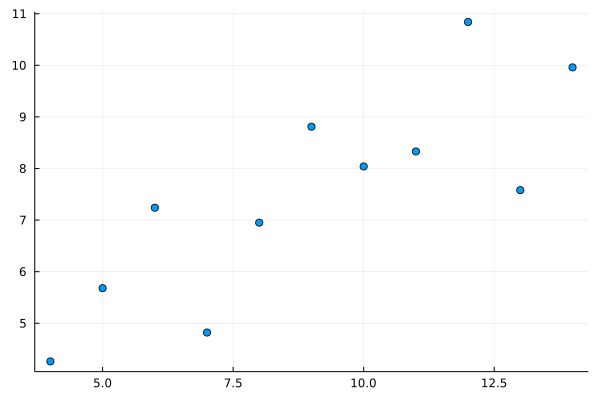

In [43]:
using Plots
scatter(aq[:, 1], aq[:, 2]; legend=false)

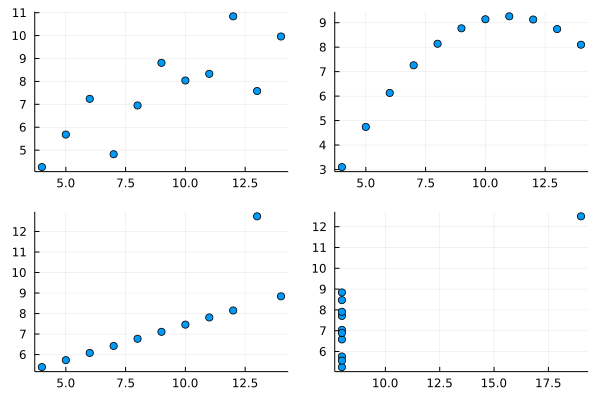

In [44]:
plot(scatter(aq[:, 1], aq[:, 2]; legend=false),
     scatter(aq[:, 3], aq[:, 4]; legend=false),
     scatter(aq[:, 5], aq[:, 6]; legend=false),
     scatter(aq[:, 7], aq[:, 8]; legend=false))

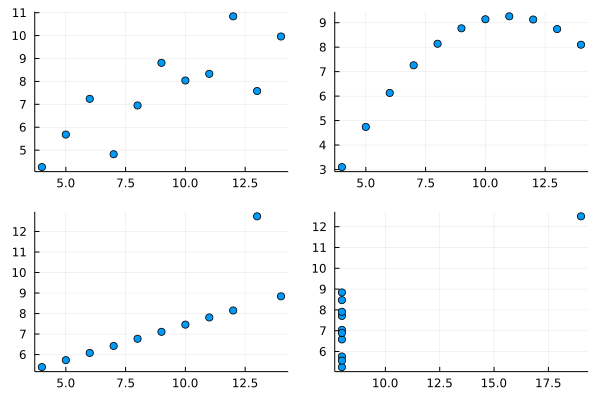

In [45]:
plot([scatter(aq[:, i], aq[:, i+1]; legend=false) for i in 1:2:7]...)

## Mapping key-value pairs with dictionaries

### The Sicherman puzzle

### Creating a dictionary

In [46]:
two_standard = Dict{Int, Int}()

Dict{Int64, Int64}()

In [47]:
for i in [1, 2, 3, 4, 5, 6]
    for j in [1, 2, 3, 4, 5, 6]
        s = i + j
        if haskey(two_standard, s)
            two_standard[s] += 1
        else
            two_standard[s] = 1
        end
    end
end

In [48]:
two_standard

Dict{Int64, Int64} with 11 entries:
  5  => 4
  12 => 1
  8  => 5
  6  => 5
  11 => 2
  9  => 4
  3  => 2
  7  => 6
  4  => 3
  2  => 1
  10 => 3

In [49]:
keys(two_standard)

KeySet for a Dict{Int64, Int64} with 11 entries. Keys:
  5
  12
  8
  6
  11
  9
  3
  7
  4
  2
  10

In [50]:
values(two_standard)

ValueIterator for a Dict{Int64, Int64} with 11 entries. Values:
  4
  1
  5
  5
  2
  4
  2
  6
  3
  1
  3

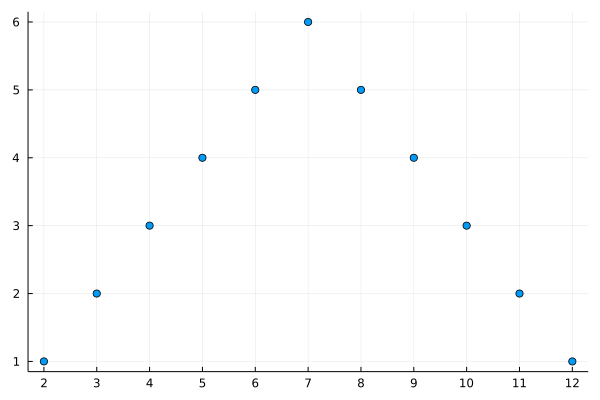

In [51]:
using Plots
scatter(collect(keys(two_standard)),
        collect(values(two_standard));
        legend=false, xaxis=2:12)

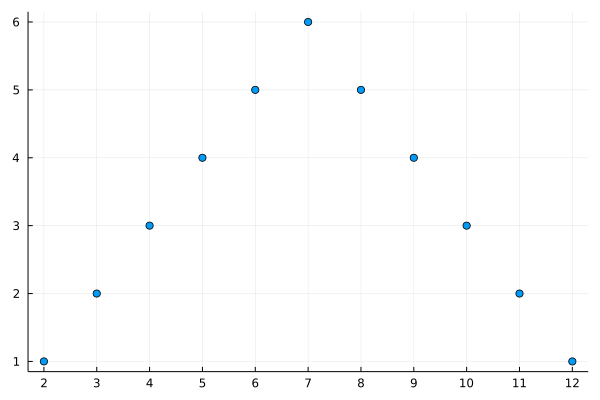

In [52]:
scatter(two_standard; legend=false, xaxis=2:12)

### Solving the Sicherman puzzle

In [53]:
all_dice = [[1, x2, x3, x4, x5, x6]
            for x2 in 2:11
            for x3 in x2:11
            for x4 in x3:11
            for x5 in x4:11
            for x6 in x5:11]

2002-element Vector{Vector{Int64}}:
 [1, 2, 2, 2, 2, 2]
 [1, 2, 2, 2, 2, 3]
 [1, 2, 2, 2, 2, 4]
 [1, 2, 2, 2, 2, 5]
 [1, 2, 2, 2, 2, 6]
 [1, 2, 2, 2, 2, 7]
 [1, 2, 2, 2, 2, 8]
 [1, 2, 2, 2, 2, 9]
 [1, 2, 2, 2, 2, 10]
 [1, 2, 2, 2, 2, 11]
 [1, 2, 2, 2, 3, 3]
 [1, 2, 2, 2, 3, 4]
 [1, 2, 2, 2, 3, 5]
 ⋮
 [1, 9, 9, 11, 11, 11]
 [1, 9, 10, 10, 10, 10]
 [1, 9, 10, 10, 10, 11]
 [1, 9, 10, 10, 11, 11]
 [1, 9, 10, 11, 11, 11]
 [1, 9, 11, 11, 11, 11]
 [1, 10, 10, 10, 10, 10]
 [1, 10, 10, 10, 10, 11]
 [1, 10, 10, 10, 11, 11]
 [1, 10, 10, 11, 11, 11]
 [1, 10, 11, 11, 11, 11]
 [1, 11, 11, 11, 11, 11]

In [54]:
for d1 in all_dice, d2 in all_dice
    test = Dict{Int, Int}()
    for i in d1, j in d2
        s = i + j
        if haskey(test, s)
            test[s] += 1
        else
            test[s] = 1
        end
    end
    if test == two_standard
        println(d1, " ", d2)
    end
end

[1, 2, 2, 3, 3, 4] [1, 3, 4, 5, 6, 8]
[1, 2, 3, 4, 5, 6] [1, 2, 3, 4, 5, 6]
[1, 3, 4, 5, 6, 8] [1, 2, 2, 3, 3, 4]


## Structuring your data using named tuples

### Defining named tuples and accessing their contents

In [55]:
dataset1 = (x=aq[:, 1], y=aq[:, 2])

(x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

In [56]:
dataset1[1]

11-element Vector{Float64}:
 10.0
  8.0
 13.0
  9.0
 11.0
 14.0
  6.0
  4.0
 12.0
  7.0
  5.0

In [57]:
dataset1.x

11-element Vector{Float64}:
 10.0
  8.0
 13.0
  9.0
 11.0
 14.0
  6.0
  4.0
 12.0
  7.0
  5.0

In [58]:
data = (set1=(x=aq[:, 1], y=aq[:, 2]),
        set2=(x=aq[:, 3], y=aq[:, 4]),
        set3=(x=aq[:, 5], y=aq[:, 6]),
        set4=(x=aq[:, 7], y=aq[:, 8]))

(set1 = (x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]), set2 = (x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], y = [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74]), set3 = (x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], y = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]), set4 = (x = [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0], y = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]))

In [59]:
data.set1

(x = [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0], y = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

In [60]:
data.set1.x

11-element Vector{Float64}:
 10.0
  8.0
 13.0
  9.0
 11.0
 14.0
  6.0
  4.0
 12.0
  7.0
  5.0

### Analyzing Anscombe's quartet data stored in a named tuple

In [61]:
using Statistics
map(s -> mean(s.x), data)

(set1 = 9.0, set2 = 9.0, set3 = 9.0, set4 = 9.0)

In [62]:
map(s -> cor(s.x, s.y), data)

(set1 = 0.8164205163448398, set2 = 0.8162365060002429, set3 = 0.8162867394895983, set4 = 0.8165214368885028)

In [63]:
using GLM
model = lm(@formula(y ~ x), data.set1)

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}}}}, Matrix{Float64}}

y ~ 1 + x

Coefficients:
───────────────────────────────────────────────────────────────────────
                Coef.  Std. Error     t  Pr(>|t|)  Lower 95%  Upper 95%
───────────────────────────────────────────────────────────────────────
(Intercept)  3.00009     1.12475   2.67    0.0257   0.455737   5.54444
x            0.500091    0.117906  4.24    0.0022   0.23337    0.766812
───────────────────────────────────────────────────────────────────────

In [64]:
r2(model)

0.666542459508775

## Understanding composite types and mutability of values in Julia

### Composite types

In [65]:
model.mm

ModelMatrix{Matrix{Float64}}([1.0 10.0; 1.0 8.0; … ; 1.0 7.0; 1.0 5.0], [1, 2])

### Mutability of values

In [66]:
x = [3, 1, 3, 2] 

4-element Vector{Int64}:
 3
 1
 3
 2

In [67]:
unique(x)

3-element Vector{Int64}:
 3
 1
 2

In [68]:
x

4-element Vector{Int64}:
 3
 1
 3
 2

In [69]:
unique!(x)

3-element Vector{Int64}:
 3
 1
 2

In [70]:
x

3-element Vector{Int64}:
 3
 1
 2

In [71]:
empty_field!(nt, i) = empty!(nt[i])

empty_field! (generic function with 1 method)

In [72]:
nt = (dict = Dict("a" => 1, "b" => 2), int=10)

(dict = Dict("b" => 2, "a" => 1), int = 10)

In [73]:
nt

(dict = Dict("b" => 2, "a" => 1), int = 10)